In [1]:
import numpy as np
import matplotlib.pyplot as plt

Lx = Ly = 1 # Domain size

#### Solve a 2D heat equation on a rectangular region with Dirichlet boundary condition

In [2]:
def solve_2d_heat(Nx, Ny, T, nsteps, cx=1/2, cy=1/2, sigmax=0.1, sigmay=0.2, alpha = 0.1):
    """
        Nx, Ny are the number of grid points in x and y coordinates
        T is the time
        nsteps is the number of steps in time
        cx, cy, sigmax and sigmay determines the initial condition
        alpha is the thermal diffusivity
    """

    dx = Lx / (Nx - 1)
    dy = Ly / (Ny - 1)
    dt = T / nsteps

    # Initialize the grid
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    x, y = np.meshgrid(x, y)
    U = np.zeros(np.shape(x))

    # Set initial condition (e.g., a Gaussian pulse)
    mid_x, mid_y = cx*Lx, cy*Ly
    U[:, :] = np.exp(-((x - mid_x)**2 /2/sigmax**2 + (y - mid_y)**2/2/sigmay**2))
    
    # Boundary conditions (e.g., Dirichlet boundaries)
    def apply_boundaries(U):
        U[0,:] = U[-1,:] = U[:,0] = U[:,-1] = 0

    # Finite difference scheme for spatial derivatives
    def laplacian(U):
        return (np.roll(U, -1, axis=0) - 2*U + np.roll(U, 1, axis=0))/dy**2 \
               + (np.roll(U, -1, axis=1) - 2*U + np.roll(U, 1, axis=1))/dx**2

    for n in range(nsteps):
        U_new = U.copy()
        U_new += alpha * dt * laplacian(U)
        apply_boundaries(U_new)
        U = U_new
    
    return U

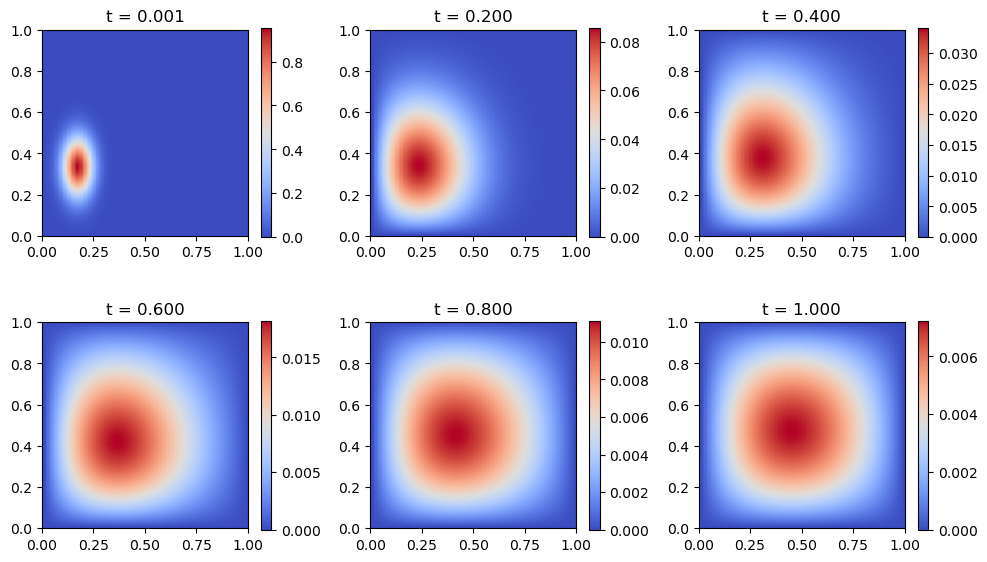

In [3]:
Nx = 50
Ny = 100
t_list = [0.001, 0.2, 0.4, 0.6, 0.8, 1.0]
fig = plt.figure(figsize=(10,6))

for j in range(len(t_list)):
    plt.subplot(2, 3, j+1)
    T = t_list[j]
    n_steps = int(np.ceil(5000*T))
    U = solve_2d_heat(Nx, Ny, T, n_steps, cx = 1/6, cy=1/3, sigmax=0.05, sigmay=0.1)
    plt.imshow(U, origin='lower', cmap='coolwarm', extent=[0, Lx, 0, Ly])
    plt.colorbar(shrink=0.8)
    plt.title('t = {:.3f}'.format(T))
    
plt.tight_layout()
plt.show()